# Benchmarking Results

In [1]:
import numpy as np
import pandas as pd
import notebook_helper_functions.plot_functions as plot_funcs

TODO
1. Pick notebook wide matplotlib color scheme
2. Build better way to set font sizes globally
3. Check and make sure rate calculation are correct (dynamically based on batch or replicate size)
4. Decide how to plot variability - SEM? STDEV? Use max were appropriate (i.e. max memory footprint)?
5. Maybe work on SQL load?
6. Finish final optimized benchmark with plots and analysis
7. Add notes/discussion
8. Save plots for slides
9. Include evaluation/samples of summaries somehow
10. Quantify accumulated speed up at each step.

## 1. Baseline execute time

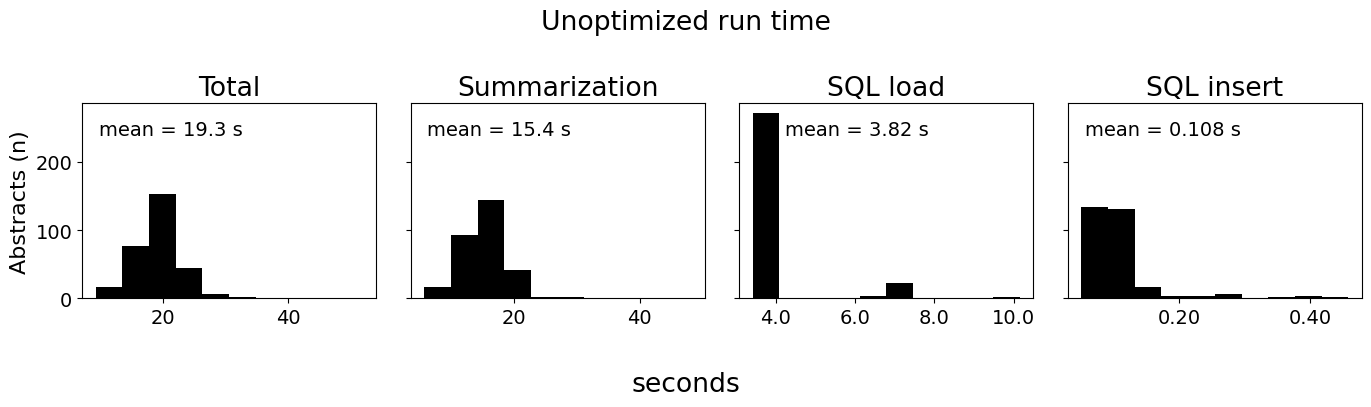

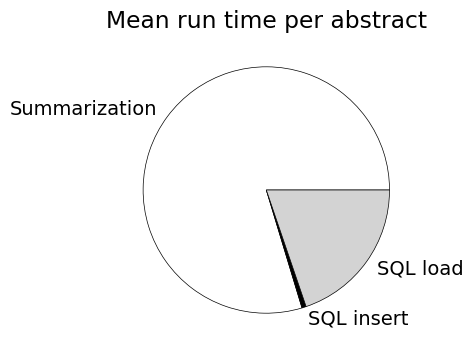

In [2]:
data = plot_funcs.baseline_execution_plot('../benchmarks/baseline_execute_time/results.csv')
plot_funcs.baseline_execution_pie('../benchmarks/baseline_execute_time/results.csv')

**Conclusion**: Not surprisingly, the most time is spent in inference - waiting for the model to summarize the abstract. Focus optimization effort there.

## 2. Huggingface device map

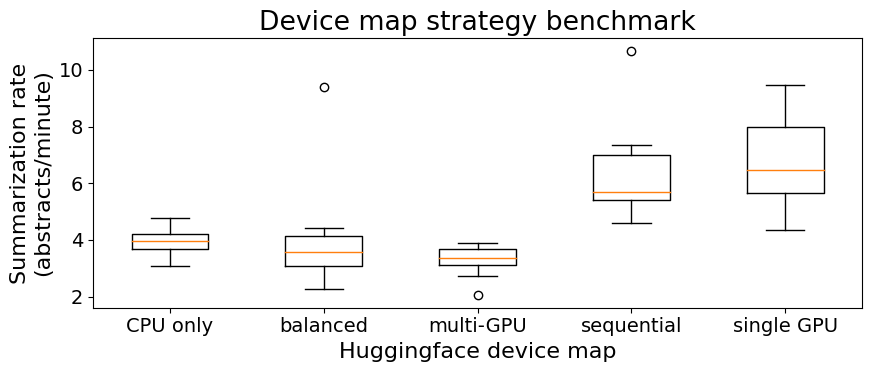

In [3]:
data = plot_funcs.device_map_plot('../benchmarks/huggingface_device_map/results.csv', show_table = False)

**Conclusion**: Single GPU or sequential is the best device map. Focus on single GPU moving forward so that data parallel inference can be run on multiple GPUs.

## 3. Parallel summarization

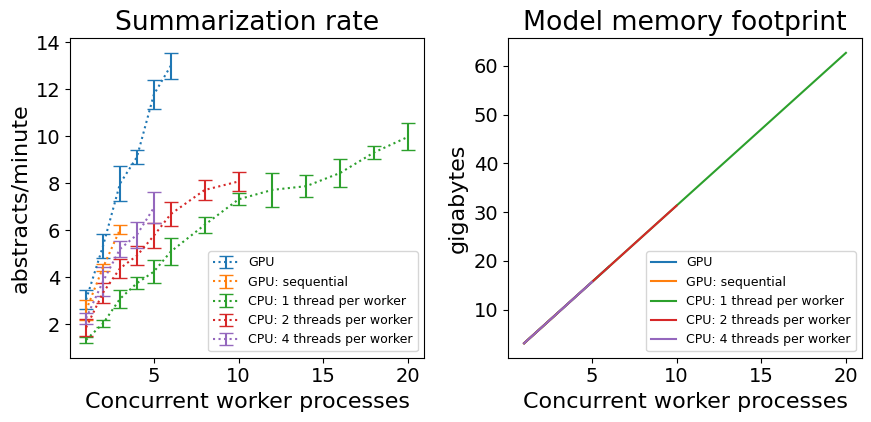

In [4]:
data = plot_funcs.parallel_summarization_plot(    
    data_file='../benchmarks/parallel_summarization/results.csv',
    show_table=False,
    plot_vars=['summarization rate (abstracts/min.)', 'model memory footprint (GB)'],
    plot_devices=['GPU', 'GPU: sequential', 'CPU: 1 thread per worker', 'CPU: 2 threads per worker', 'CPU: 4 threads per worker'],
    legend_entries=['GPU', 'GPU: sequential', 'CPU: 1 thread per worker', 'CPU: 2 threads per worker', 'CPU: 4 threads per worker'],
    unique_condition_columns=[
        'device',
        'workers'
    ],
    oom_columns=[
        'summarization time (sec.)',
        'summarization rate (abstracts/sec.)',
        'model memory footprint (bytes)',
        'max memory allocated (bytes)',
    ],
    str_columns=['device'], 
    int_columns=[
        'replicate',
        'workers',
        'model memory footprint (bytes)',
        'max memory allocated (bytes)'
    ], 
    float_columns=[
        'summarization time (sec.)',
        'summarization rate (abstracts/sec.)',
    ],
    oom_replacement_val=np.nan
)

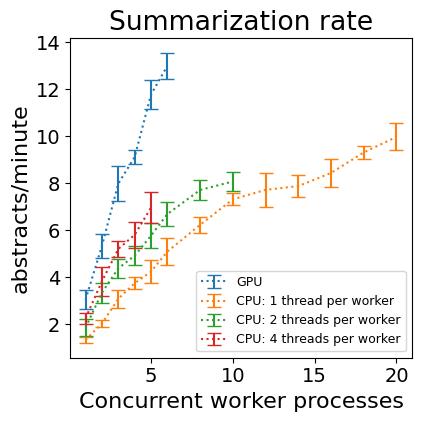

In [5]:
data = plot_funcs.parallel_summarization_plot(    
    data_file='../benchmarks/parallel_summarization/results.csv',
    show_table=False,
    plot_vars=['summarization rate (abstracts/min.)'],
    plot_devices=['GPU', 'CPU: 1 thread per worker', 'CPU: 2 threads per worker', 'CPU: 4 threads per worker'],
    legend_entries=['GPU', 'CPU: 1 thread per worker', 'CPU: 2 threads per worker', 'CPU: 4 threads per worker'],
    unique_condition_columns=[
        'device',
        'workers'
    ],
    oom_columns=[
        'summarization time (sec.)',
        'summarization rate (abstracts/sec.)',
        'model memory footprint (bytes)',
        'max memory allocated (bytes)',
    ],
    str_columns=['device'], 
    int_columns=[
        'replicate',
        'workers',
        'model memory footprint (bytes)',
        'max memory allocated (bytes)'
    ], 
    float_columns=[
        'summarization time (sec.)',
        'summarization rate (abstracts/sec.)',
    ],
    oom_replacement_val=np.nan
)

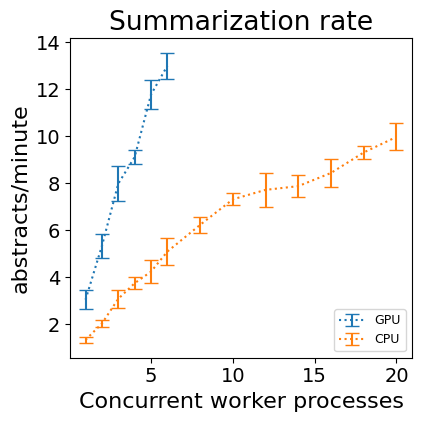

In [6]:
data = plot_funcs.parallel_summarization_plot(    
    data_file='../benchmarks/parallel_summarization/results.csv',
    show_table=False,
    plot_vars=['summarization rate (abstracts/min.)'],
    plot_devices=['GPU', 'CPU: 1 thread per worker'],
    legend_entries=['GPU', 'CPU'],
    unique_condition_columns=[
        'device',
        'workers'
    ],
    oom_columns=[
        'summarization time (sec.)',
        'summarization rate (abstracts/sec.)',
        'model memory footprint (bytes)',
        'max memory allocated (bytes)',
    ],
    str_columns=['device'], 
    int_columns=[
        'replicate',
        'workers',
        'model memory footprint (bytes)',
        'max memory allocated (bytes)'
    ], 
    float_columns=[
        'summarization time (sec.)',
        'summarization rate (abstracts/sec.)',
    ],
    oom_replacement_val=np.nan
)

**Conclusion** Not surprisingly, GPU still beats CPU, even though more parallel jobs can run on CPU due to more available system memory.

## 4. Model quantization

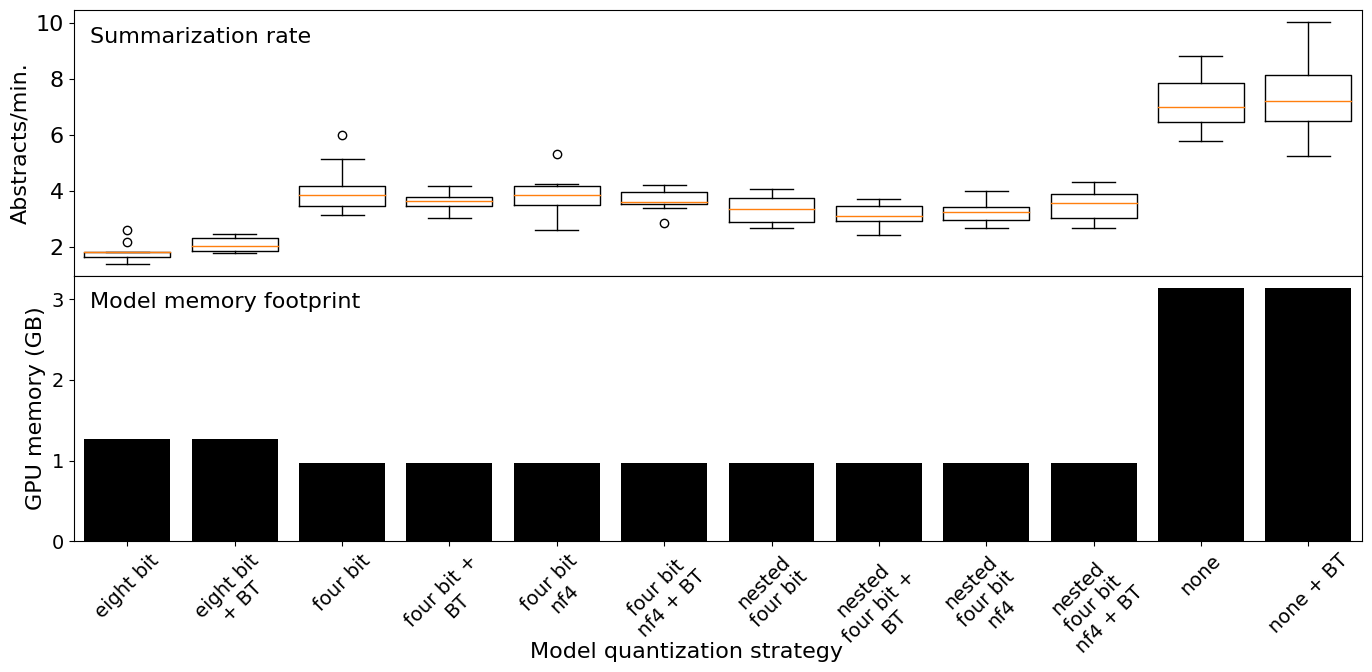

In [7]:
data = plot_funcs.model_quantization_plot('../benchmarks/model_quantization/results.csv', show_table = False)

**Conclusion**: Quantization can decrease the model's memory footprint by about 3-fold, but at a significant cost to inference speed.

## 5. Batched summarization

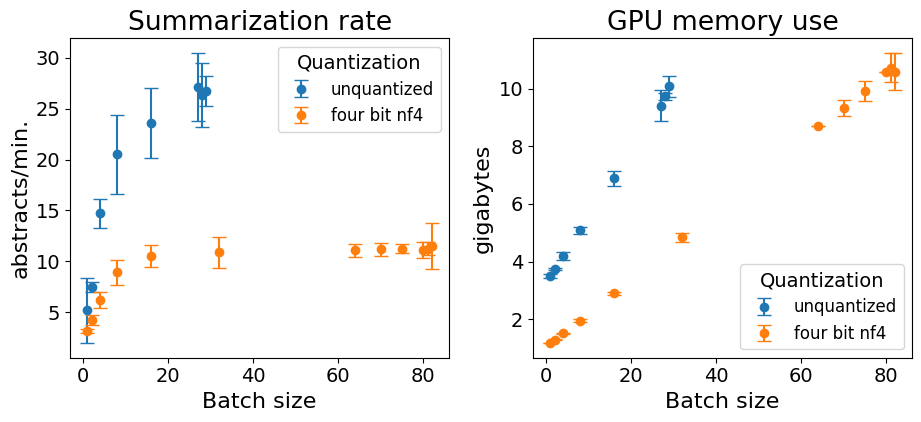

In [8]:
data = plot_funcs.batched_summarization_plot(
    data_file='../benchmarks/batched_summarization/results.csv',
    show_table=False,
    unique_condition_columns=[
        'batch size',
        'quantization'
    ],
    oom_columns=[
        'summarization time (sec.)',
        'summarization rate (abstracts/sec.)',
        'model memory footprint (bytes)',
        'max memory allocated (bytes)',
    ],
    quantization_method='four bit nf4',
    str_columns=['quantization'], 
    int_columns=[
        'model memory footprint (bytes)',
        'max memory allocated (bytes)'
    ], 
    float_columns=[
        'summarization time (sec.)',
        'summarization rate (abstracts/sec.)',
    ],
    oom_replacement_val=np.nan
)

**Conclusion**: Quantization allows for larger batch sizes due to the smaller memory footprint of the model, but the resulting speedup is not enough to make up for the lower summarization rate quantization also causes. Don't bother quantizing the model.

## 5. Parallel batched summarization
### TODO
1. ~~Fix plot legend so that worker nums which are not on plot don't appear.~~
2. ~~Add dot + larger bar caps.~~
3. Do some fits - we should pretty easily be able to come up with a function which gives us total memory footprint from batch size and worker num. It's very linear.
4. Try log2 y-axis on rate plots. -> looks good for rates, but makes memory not visually linear. Maybe try without shared x or on plots of rate only. Also breaks our manual axis padding... not going to use it for now.

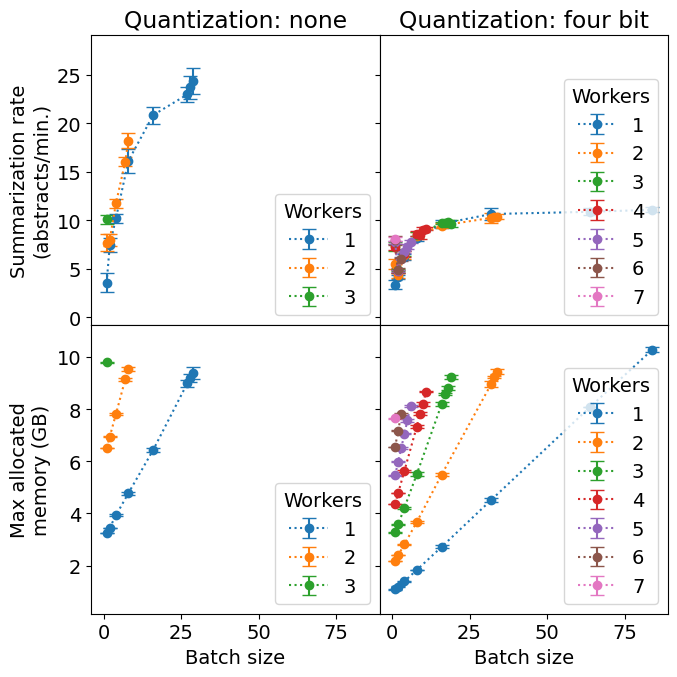

Mean max memory allocated (GB)
                   max memory allocated (GB)       \
quantization                        four bit none   
workers batch size                                  
1       1                                1.1  3.3   
        2                                1.2  3.5   
        4                                1.4  3.9   
        8                                1.8  4.8   
        16                               2.7  6.4   
        27                               nan  9.0   
        28                               nan  9.2   
        29                               nan  9.4   
        32                               4.5  nan   
        64                               8.1  nan   
        84                              10.3  nan   
2       1                                2.2  6.5   
        2                                2.4  6.9   
        4                                2.8  7.8   
        7                                nan  9.1   
        8      

In [9]:
data = plot_funcs.parallel_batched_summarization_plot(
    data_file='../benchmarks/parallel_batched_summarization/single_GPU_results.csv',
    logx=False,
    show_table = True,
    unique_condition_columns=[
        'batch size',
        'quantization',
        'workers'
    ],
    oom_columns=[
        'summarization time (sec.)',
        'summarization rate (abstracts/sec.)',
        'model memory footprint (bytes)',
        'max memory allocated (bytes)',
    ],
    str_columns=['quantization'], 
    int_columns=[
        'workers',
        'model memory footprint (bytes)',
        'max memory allocated (bytes)'
    ], 
    float_columns=[
        'summarization time (sec.)',
        'summarization rate (abstracts/sec.)',
    ],
    oom_replacement_val=np.nan    
)

**Conclusion**: Same as perviously, more quantized models can be run in parallel due to memory savings, but the speed up due to increased parallelism is not enough to compete with the un-quantized model. One worker per GPU with the largest batch size that will fit in memory (16) wins.

## 6. SQL Insert

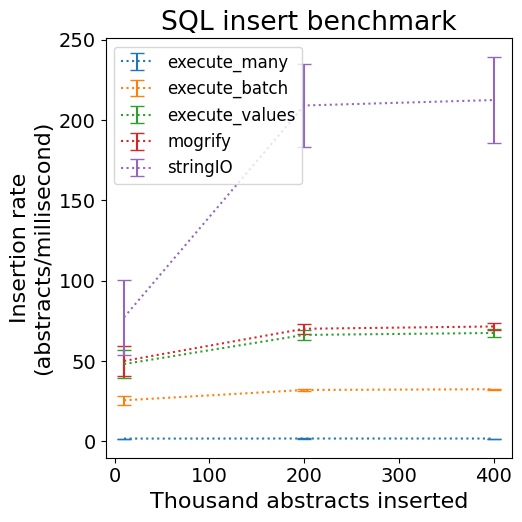

In [10]:
data = plot_funcs.sql_insert_plot('../benchmarks/sql_insert/results.csv', show_table = False)

**Conclusion**: StringIO with 200,000 abstracts per call wins by a mile. SQL was definitely not the bottleneck here - but, why not speed it up?

## 7. Final result

In [11]:
total_secs = 3580000 * 15.4
total_mins = total_secs / 60
total_hrs = total_mins / 60
total_unoptimized_days = total_hrs / 24
print(f'Estimated total summarization time, before optimization: {round(total_unoptimized_days, 0)} days.')

total_mins = 3580000 * (1/(27*2))
total_hrs = total_mins / 60
total_optimized_days = total_hrs / 24
print(f'Estimated total summarization time, after optimization: {round(total_optimized_days, 0)} days.')

print(f'\nTotal speed-up: {round(total_unoptimized_days / total_optimized_days, 0)} fold.')

Estimated total summarization time, before optimization: 638.0 days.
Estimated total summarization time, after optimization: 46.0 days.

Total speed-up: 14.0 fold.
